In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
# loading the models

model_path = 'models/'
model1 = load_model(model_path + 'model-cnn.h5')
model2 = load_model(model_path + 'model-vgg.h5')
model3 = load_model(model_path + 'model-resnet.h5')
model4 = load_model(model_path + 'model-densenet.h5')

In [8]:
# loading data

data_path = 'data/'
x_test_normalized = np.load(data_path + 'fer-testx-complete.npy')
y_test = np.load(data_path + 'fer-testy-complete.npy')

In [9]:
# predict output using all models separately

true_labels = y_test

predictions1 = model1.predict(x_test_normalized)

predictions2 = model2.predict(x_test_normalized)

predictions3 = model3.predict(x_test_normalized)

predictions4 = model4.predict(x_test_normalized)

225/225 ━━━━━━━━━━━━━━━━━━━━ 47s 207ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step


In [10]:
# combine predictions by taking average of the predictions

combined_prediction = np.zeros((7))

combined_prediction = (predictions1 + predictions2 + predictions3 + predictions4)/4
combined_prediction = np.argmax(combined_prediction, axis=1)

combined_prediction

array([0, 0, 5, ..., 6, 6, 6], dtype=int64)

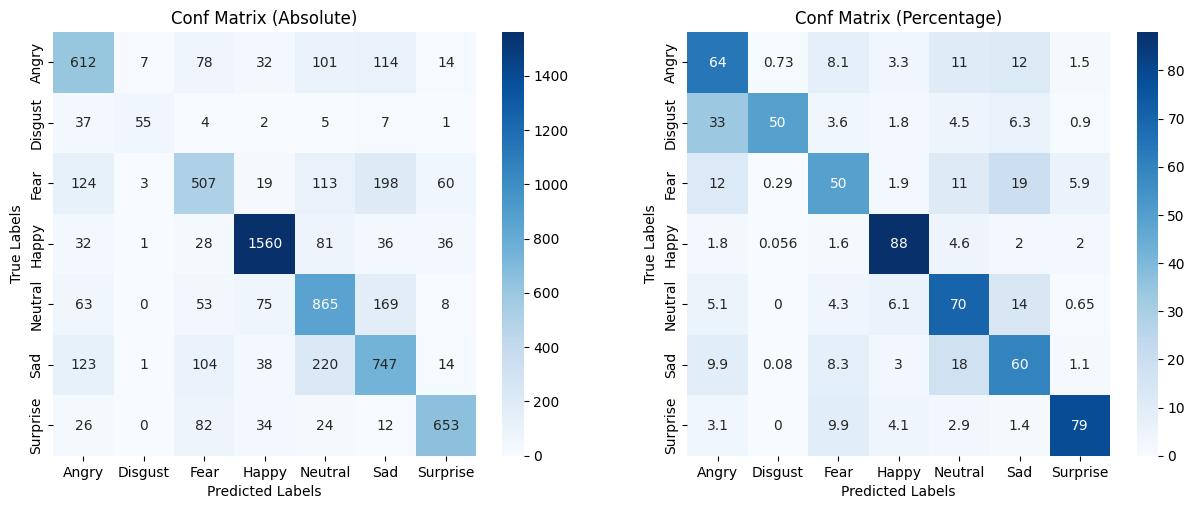

In [14]:
# plot confusion matrices to analyse performance

plt.figure(figsize=(15,5.5))

plt.subplot(121)
cm = confusion_matrix(true_labels, combined_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(7)+0.5, labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])
plt.yticks(np.arange(7)+0.5, labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])
plt.title('Conf Matrix (Absolute)')

plt.subplot(122)
cm = cm.astype(float)
for i in range(len(cm)):
    cm[i] = 100*cm[i]/np.sum(cm[i])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(7)+0.5, labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])
plt.yticks(np.arange(7)+0.5, labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])
plt.title('Conf Matrix (Percentage)')

plt.show()

In [15]:
# calculate metrics for performance of ensemble model

print(classification_report(true_labels, combined_prediction))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       958
           1       0.82      0.50      0.62       111
           2       0.59      0.50      0.54      1024
           3       0.89      0.88      0.88      1774
           4       0.61      0.70      0.65      1233
           5       0.58      0.60      0.59      1247
           6       0.83      0.79      0.81       831

    accuracy                           0.70      7178
   macro avg       0.70      0.66      0.67      7178
weighted avg       0.70      0.70      0.70      7178

